In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


/home/seraphin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Importation des données

In [2]:
data = pd.read_csv("Car_Price_Prediction.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Analyse Exploratoire


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
data.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

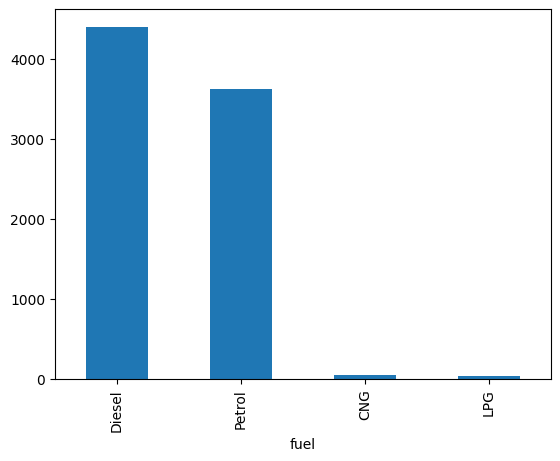

In [5]:
data.fuel.value_counts().plot(kind="bar");

In [6]:
data.seller_type.value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

<Axes: xlabel='seller_type'>

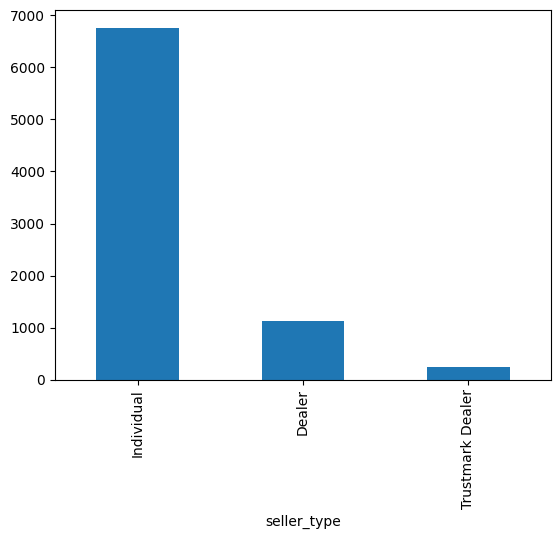

In [7]:
data.seller_type.value_counts().plot(kind="bar")

In [8]:
data.transmission.value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

<Axes: xlabel='transmission'>

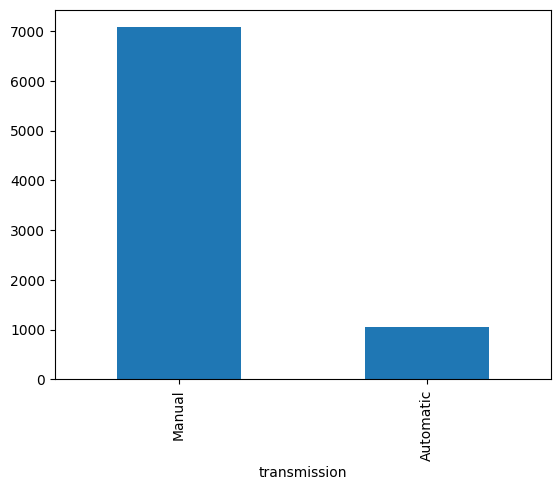

In [9]:
data.transmission.value_counts().plot(kind="bar")

In [10]:
data["mileage"] = data["mileage"].str.replace("kmpl", "")
data["max_power"] = data["max_power"].str.replace("bhp", "")
data["engine"] = data["engine"].str.replace("CC", "")

Nettoyage de donnéés

In [11]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [13]:
columns=["name","owner", "torque"]
columns

['name', 'owner', 'torque']

In [14]:
data.drop(columns, axis=1, inplace=True)

In [15]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,17.7,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,23.0,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,16.1,1298,88.2,5.0


In [16]:
fuel_en = {
    "Diesel" : 1,
    "Petrol" : 2,
    "CNG" : 3,
    "LPG" : 4
}

seller_type_en = {
    "Individual" : 1,
    "Dealer" : 2,
    "Trustmark Dealer" : 3,
}

transmission_en = {
    "transmission" : 1,
    "Manual" : 2,
    "Automatic" : 3,
}

data.transmission = data.transmission.map(transmission_en)
data.transmission.astype("int")

data.seller_type = data.seller_type.map(seller_type_en)
data.seller_type.astype("int")

data.fuel = data.fuel.map(fuel_en)
data.fuel.astype("int")

0       1
1       1
2       2
3       1
4       2
       ..
8123    2
8124    1
8125    1
8126    1
8127    1
Name: fuel, Length: 8128, dtype: int64

In [17]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,2,23.4,1248,74,5.0
1,2014,370000,120000,1,1,2,21.14,1498,103.52,5.0
2,2006,158000,140000,2,1,2,17.7,1497,78,5.0
3,2010,225000,127000,1,1,2,23.0,1396,90,5.0
4,2007,130000,120000,2,1,2,16.1,1298,88.2,5.0


In [18]:
data.mileage.value_counts()

mileage
18.9           225
19.7           173
18.6           164
21.1           157
17.0           133
              ... 
16.34            1
19.69            1
20.88 km/kg      1
17.8 km/kg       1
16.51            1
Name: count, Length: 393, dtype: int64

In [19]:
data["mileage"] = data["mileage"].str.split(".").str[0]
data["max_power"] = data["max_power"].str.split(".").str[0]

In [20]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,2,23,1248,74,5.0
1,2014,370000,120000,1,1,2,21,1498,103,5.0
2,2006,158000,140000,2,1,2,17,1497,78,5.0
3,2010,225000,127000,1,1,2,23,1396,90,5.0
4,2007,130000,120000,2,1,2,16,1298,88,5.0


In [21]:
data.dropna(inplace=True)

In [22]:
data.max_power.value_counts()

max_power
88      705
81      448
67      424
74      377
73      245
       ... 
86        1
282       1
155       1
224       1
135       1
Name: count, Length: 204, dtype: int64

In [23]:
data = data[data["max_power"].str.strip() != ""]
data.max_power = data.max_power.astype("int64")

In [24]:
data.mileage = data.mileage.astype("int")
data.engine = data.engine.astype("int")
data.seats = data.seats.astype("int")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7906 non-null   int64
 1   selling_price  7906 non-null   int64
 2   km_driven      7906 non-null   int64
 3   fuel           7906 non-null   int64
 4   seller_type    7906 non-null   int64
 5   transmission   7906 non-null   int64
 6   mileage        7906 non-null   int64
 7   engine         7906 non-null   int64
 8   max_power      7906 non-null   int64
 9   seats          7906 non-null   int64
dtypes: int64(10)
memory usage: 679.4 KB


In [26]:
data.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

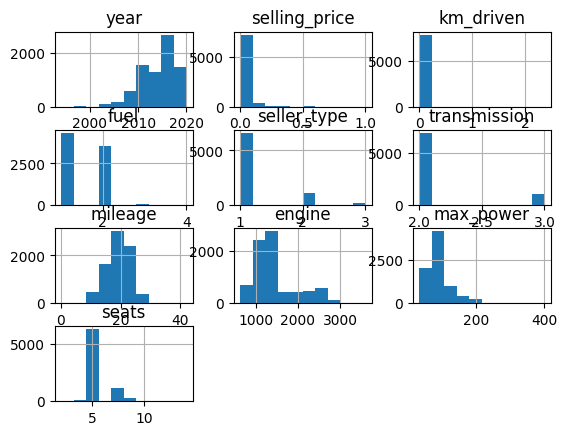

In [27]:
hist = [data.columns]
for item in hist:
  data[item].hist()

In [28]:
data.corr()["selling_price"]

year             0.412302
selling_price    1.000000
km_driven       -0.222158
fuel            -0.203686
seller_type      0.321389
transmission     0.590269
mileage         -0.125535
engine           0.455682
max_power        0.749974
seats            0.041617
Name: selling_price, dtype: float64

In [29]:
col = ["km_driven", "fuel", "mileage"]
data.drop(col, axis=1, inplace=True)

In [32]:
data.to_csv("Car_data.csv")

In [33]:
X = data.drop(columns="selling_price")
y = data.selling_price

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [35]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (5534, 6)
X_test (2372, 6)
y_train (5534,)
y_test (2372,)


In [36]:
# pip install lazypredict

In [37]:
# from lazypredict.Supervised import LazyClassifier
# lc = LazyClassifier()

In [38]:
#models, predictions = lc.fit(X_train, X_test, y_train, y_test)

In [39]:
#print(models)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [41]:
# 1. Regression Analysis (Linear Regression)
# Train and evaluate the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_score = linear_reg_model.score(X_test, y_test)
print("Linear Regression R^2 Score:", linear_reg_score)

Linear Regression R^2 Score: 0.6578574916920963


In [42]:
# 2. Random Forest
# Train and evaluate the random forest model
modele = RandomForestRegressor(n_estimators=100, random_state=42)
modele.fit(X_train, y_train)
random_forest_score = modele.score(X_test, y_test)
print("Random Forest R^2 Score:", random_forest_score)


Random Forest R^2 Score: 0.9694063448853655


In [43]:
# 3. Gradient Boosting
# Train and evaluate the gradient boosting model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_score = gradient_boosting_model.score(X_test, y_test)
print("Gradient Boosting R^2 Score:", gradient_boosting_score)

Gradient Boosting R^2 Score: 0.9578793239799949


In [44]:
# 4. Neural Network
# Train and evaluate the neural network model
neural_network_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
neural_network_model.fit(X_train, y_train)
neural_network_score = neural_network_model.score(X_test, y_test)
print("Neural Network R^2 Score:", neural_network_score)


Neural Network R^2 Score: 0.6014825501550467


/home/seraphin/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
data.head()

,year,selling_price,seller_type,transmission,engine,max_power,seats
0,2014,450000,1,2,1248,74,5
1,2014,370000,1,2,1498,103,5
2,2006,158000,1,2,1497,78,5
3,2010,225000,1,2,1396,90,5
4,2007,130000,1,2,1298,88,5


In [46]:
data_dict = {
    'year': 2030,
    'seller_type': 1,
    'transmission': 2,
    'engine': 1288,
    'max_power': 200,
    'seats': 2
}


In [47]:
data_dict

{'year': 2030,
 'seller_type': 1,
 'transmission': 2,
 'engine': 1288,
 'max_power': 200,
 'seats': 2}

In [48]:
index = [0]
# Create the DataFrame
df = pd.DataFrame(data_dict, index=index)
df

,year,seller_type,transmission,engine,max_power,seats
0,2030,1,2,1288,200,2


In [49]:
modele.predict(df)

array([4492113.33333333])

In [50]:
data.to_csv("Car_data")

In [51]:
import joblib

In [52]:
joblib.dump(value=modele, filename="model_RF.plk")

['model_RF.plk']

In [53]:
modele_load = joblib.load(filename="model_RF.plk")

In [54]:
modele_load.predict(df)

array([4492113.33333333])